In [1]:
import numpy as np

from shapely.geometry import Polygon, MultiPoint

import matplotlib.pyplot as plt

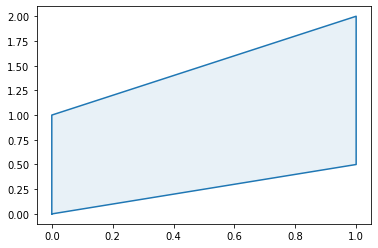

In [2]:
coords = np.array([[0, 0], [0, 1], [1, 2], [1, 0.5]])

polygon = Polygon(coords)

x,y = polygon.exterior.xy

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill(x,y, alpha=0.1)
plt.show()

[1.00000000e-06 1.11111889e-01 2.22222778e-01 3.33333667e-01
 4.44444556e-01 5.55555444e-01 6.66666333e-01 7.77777222e-01
 8.88888111e-01 9.99999000e-01] [1.00000000e-06 1.05264053e-01 2.10527105e-01 3.15790158e-01
 4.21053211e-01 5.26316263e-01 6.31579316e-01 7.36842368e-01
 8.42105421e-01 9.47368474e-01 1.05263153e+00 1.15789458e+00
 1.26315763e+00 1.36842068e+00 1.47368374e+00 1.57894679e+00
 1.68420984e+00 1.78947289e+00 1.89473595e+00 1.99999900e+00]


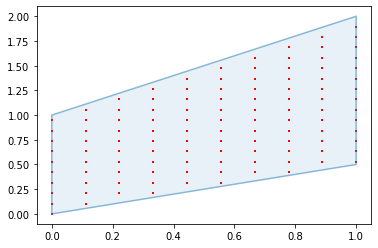

In [3]:
def eqi_grid_polygon(polygon, grid_size):
    min_x, min_y, max_x, max_y = polygon.bounds
    
    n_x = int((max_x - min_x) / grid_size)
    n_y = int((max_y - min_y) / grid_size)
    
    x_grid = np.linspace(min_x+1e-6, max_x-1e-6, n_x)
    y_grid = np.linspace(min_y+1e-6, max_y-1e-6, n_y)
    
    print(x_grid, y_grid)
    
    grid = np.meshgrid(x_grid, y_grid)
        
    grid = np.vstack([grid[0].ravel(), grid[1].ravel()]).T   

    grid_mask = np.array([polygon.contains_properly(MultiPoint([point])) for point in grid])
    return grid[grid_mask]


grid = eqi_grid_polygon(polygon, 0.1)

fig, ax = plt.subplots()
ax.plot(x,y, alpha=0.5)
ax.fill(x,y, alpha=0.1)

ax.scatter(grid[:, 0], grid[:, 1], s=4, c='r', marker='+')

plt.show()